## Introduction

Gym is a python package we can use to programatically interact with existing reinforcement learning environments.  
Freeing up time and effort to focus on algorithms and research.

### Instantiating an environment

Let's start by creating the cartpole environment; a scenario where we have control of a cart balancing a pole.

In [2]:
import gym
from gym import wrappers

import numpy
from IPython import display
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline


from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

In this simple game we have 2 possible actions; moving the cart left or right.

Let's illustrate the environment taking random actions

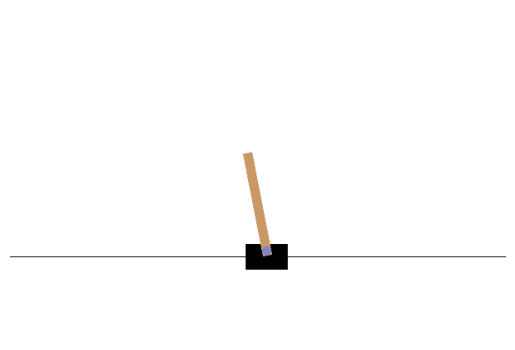

In [9]:
# env = gym.make("CartPole-v1",render_mode="human")
env = gym.make("CartPole-v1",render_mode='rgb_array')



observation = env.reset()

for _ in range(30):
    img = plt.imshow(env.render())
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    # plt.show()   
    action = env.action_space.sample() # your agent here (this takes random actions)
    observation, reward, done, truncated, info = env.step(action)
    
    if done:
        observation = env.reset()
        break
env.close()

### Break it down

Here we render the environment if we have an output device setup (using say Xming) using;

In [7]:
env.render()

We can close this output again when we call the `close` method

In [12]:
env.close()

For the example we are rendering inside this notebook for ease of use. This is actually quite slow.

### Interacting with the environment

We interact with the environment by taking a `step` in time. We continue to step until our game ends or terminates, usually called an `episode`.

A step returns a tuple of 4 objects;  

- Observation (object)  
- reward (float)  
- done (bool)  
- info (dict)

starting observation;

In [14]:
observation = env.reset()

In [15]:
observation

array([ 0.0406924 ,  0.01500509,  0.02519564, -0.03433322])

In order to take a step we must specify an action.  
Since our action space has 2 options we know that our actions can be either [0,1] index;

In [27]:
obs, reward, done, info = env.step(0)

In [28]:
obs

array([ 0.04099251, -0.18046894,  0.02450898,  0.2661915 ])

We see that our observation array has indeed changed due to our action.

Let's take a closer look at the action space provided by Gym

Let's take a closer look at the observation space provided by Gym

In [31]:
env.observation_space

Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)